In [1]:
import sqlite3
import pandas as pd

db_path="../output/education_life_expectancy.db"
conn = sqlite3.connect(db_path)

df=pd.read_sql_query("SELECT * FROM model_data", conn)

df.shape, df.columns

((1087, 9),
 Index(['Country', 'Year', 'LifeExp_Both', 'Enroll_Primary', 'Enroll_Secondary',
        'Enroll_Tertiary', 'EduExp_GDP', 'EduExp_Total', 'LifeExp_Both_lead_5'],
       dtype='object'))

In [2]:
#defining features and target variable
#target:

Y=df["LifeExp_Both_lead_5"]

# features:

feature_cols=[
    "Enroll_Primary",
    "Enroll_Secondary",
    "Enroll_Tertiary",
    "EduExp_GDP",
    "EduExp_Total",
    "LifeExp_Both"
]

X=df[feature_cols]

In [4]:
#checking
X.describe(),Y.describe()

(       Enroll_Primary  Enroll_Secondary  Enroll_Tertiary   EduExp_GDP  \
 count    1.087000e+03      1.087000e+03     1.087000e+03  1087.000000   
 mean     3.314787e+06      2.635232e+06     9.075992e+05     4.705195   
 std      1.088142e+07      8.393204e+06     2.509487e+06     1.749249   
 min      1.563000e+03      1.901000e+03     0.000000e+00     1.195280   
 25%      2.549675e+05      2.439270e+05     4.234950e+04     3.508435   
 50%      6.625130e+05      6.038340e+05     1.920220e+05     4.622390   
 75%      2.726180e+06      2.187786e+06     5.751575e+05     5.578160   
 max      1.398699e+08      1.191482e+08     2.856841e+07    15.615440   
 
        EduExp_Total  LifeExp_Both  
 count   1087.000000   1087.000000  
 mean      14.712729     71.604434  
 std        4.828712      8.465609  
 min        5.071700     14.665500  
 25%       11.194150     67.438500  
 50%       13.923230     73.341300  
 75%       16.960845     78.471300  
 max       44.801800     85.009900  

In [5]:
df[["Country","Year","LifeExp_Both","LifeExp_Both_lead_5"]].head()


,Country,Year,LifeExp_Both,LifeExp_Both_lead_5
0,Afghanistan,2014,62.2599,62.9411
1,Afghanistan,2011,61.2503,62.6459
2,Albania,2013,77.9951,79.2377
3,Albania,2007,77.6907,78.0836
4,Albania,2006,76.9943,78.3029


In [6]:
# so we are gonna split years so we train on earlier years and test on later years
df_sorted=df.sort_values("Year").reset_index(drop=True)
#reset_index is used to reset the index after sorting, so that the index goes from 0 to n-1 instead of being based on the original order of the data.

In [8]:
df_sorted["Year"].head(10), df_sorted["Year"].tail(10)


(0    1999
 1    1999
 2    1999
 3    1999
 4    1999
 5    1999
 6    1999
 7    1999
 8    1999
 9    1999
 Name: Year, dtype: int64,
 1077    2014
 1078    2014
 1079    2014
 1080    2014
 1081    2014
 1082    2014
 1083    2014
 1084    2014
 1085    2014
 1086    2014
 Name: Year, dtype: int64)

In [9]:
#no we gonna split the data between 80% training and 20% testing
split_year=int(df_sorted["Year"].quantile(0.8))

In [10]:
split_year


2010

this just means when  we splitted the years, 80% of the years came before 2010, meaning we are training our model on dataset till years 2010 and we will test our model on years after 2010

In [11]:
train=df_sorted[df_sorted["Year"]<=split_year]
test=df_sorted[df_sorted["Year"]>split_year]    
#simple, we splitted the data in train and test based on the year, so that we train on earlier years and test on later years, this is important to avoid data leakage and to simulate a real-world scenario where we want to predict future values based on past data.

train.shape, test.shape

((888, 9), (199, 9))

In [13]:
train["Year"].min(), train["Year"].max(),test["Year"].min(), test["Year"].max()


(1999, 2010, 2011, 2014)

In [14]:
X_train= train[feature_cols]
Y_train= train["LifeExp_Both_lead_5"]

# now we have splitted our training data into features and target variable, we can do the same for the test data
X_test = test[feature_cols]
y_test = test["LifeExp_Both_lead_5"]


In [16]:
X_train.head(), Y_train.head()


(   Enroll_Primary  Enroll_Secondary  Enroll_Tertiary  EduExp_GDP  \
 0        364951.0           73620.0           4046.0    14.16260   
 1         60989.0           44403.0           8880.0     4.34530   
 2        456564.0          346316.0         151137.0     4.14098   
 3      14697915.0         8721726.0        1837884.0     3.66210   
 4       2200098.0         5214106.0        1736999.0     3.61808   
 
    EduExp_Total  LifeExp_Both  
 0      23.55235       50.3848  
 1       9.63585       75.0483  
 2      12.18244       76.0890  
 3      16.34315       72.2034  
 4      13.53417       68.0037  ,
 0    44.0388
 1    76.4839
 2    78.5027
 3    73.4324
 4    67.4724
 Name: LifeExp_Both_lead_5, dtype: float64)

In [17]:
print("split_year:", split_year)
print("train rows:", train.shape[0], "test rows:", test.shape[0])
print("train years:", train["Year"].min(), "to", train["Year"].max())
print("test years:", test["Year"].min(), "to", test["Year"].max())


split_year: 2010
train rows: 888 test rows: 199
train years: 1999 to 2010
test years: 2011 to 2014


In [18]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#i dont knwo what they actually do

In [19]:
ridge_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=1.0))
])


In [20]:
ridge_model.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge())])

here the model is supposedly  trained, now we see the error and prediction

In [21]:
y_pred=ridge_model.predict(X_test)
y_pred[:10]

array([72.28640976, 81.86732327, 81.50690103, 81.65213583, 76.28484718,
       76.43190867, 82.94945547, 77.86315194, 79.73391455, 81.44714536])

In [22]:
# now we compare our predictions with reality
comparison=test[["Country","Year"]].copy()
comparison["actual_lifeexp_t_plus_5"]=y_test.values
comparison["predicted_lifeexp_t_plus_5"]=y_pred

comparison.head(10)

,Country,Year,actual_lifeexp_t_plus_5,predicted_lifeexp_t_plus_5
888,Ukraine,2011,73.3894,72.286410
889,Netherlands,2011,81.5549,81.867323
890,Portugal,2011,81.3636,81.506901
891,Austria,2011,81.5922,81.652136
892,Colombia,2011,76.2285,76.284847
893,Brunei Darussalam,2011,74.9054,76.431909
894,Spain,2011,82.9999,82.949455
895,Panama,2011,77.7724,77.863152
896,Costa Rica,2011,79.9879,79.733915
897,Ireland,2011,81.6836,81.447145


In [23]:
# now we are going to calculate the mean absolute error of our predictions, which is a common metric to evaluate regression models, it gives us an idea of how far off our predictions are from the actual values on average.
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, y_pred)
mae

0.6480337605906944

Basically this mean, the model is off by about 0.64 years of life expectancy

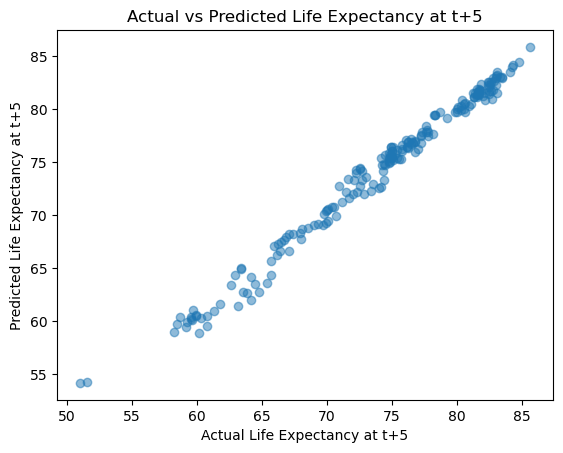

In [24]:
# we can also try to plot the actual vs predicted values to see a visual comparison
import matplotlib.pyplot as plt
plt.figure
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Life Expectancy at t+5")
plt.ylabel("Predicted Life Expectancy at t+5")  
plt.title("Actual vs Predicted Life Expectancy at t+5")
plt.show()

So whenever we train a linear model, it internally understand something like:
LifeExp_(t+5) =
  w1 * Enroll_Primary
+ w2 * Enroll_Secondary
+ w3 * Enroll_Tertiary
+ w4 * EduExp_GDP
+ w5 * EduExp_Total
+ w6 * LifeExp_Both
+ bias
now, to find what are these w(s) or weights we can inspect:

In [26]:
coefficients=ridge_model.named_steps["model"].coef_
coefficients

array([-0.04005995, -0.01249566,  0.02303372, -0.09818316, -0.31016809,
        7.7792879 ])

Now here we can make a coefficient table that match the coefficients to the feature names, that will make it more sense.

In [27]:
coef_table=pd.DataFrame({
    "feature": feature_cols,
    "coefficient": coefficients
})
coef_table

,feature,coefficient
0,Enroll_Primary,-0.040060
1,Enroll_Secondary,-0.012496
2,Enroll_Tertiary,0.023034
3,EduExp_GDP,-0.098183
4,EduExp_Total,-0.310168
5,LifeExp_Both,7.779288


Here, an interesting fact is that, the education already helped with the current life expectancy, and as once LifeExp_Both is included, education has litte information to add, so - value of education doesnt mean it negatively support life expectancy but it has very minimal effect and the highest deciding factor (7.779) is life expectancy which is also taken in account and that was caused by education in first place.